# Libraries

In [1]:
# Setup libraries 
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import RandomRotation
from tensorflow.keras.layers import RandomFlip


# Save Model Outputs

In [2]:
# Funtion to save output files and generate plots after model run

def save_results(model_name, my_model):

  '''
  save_results is a funtion to generate and save various files when a model has completed training

  Inputs

  model_name - the name of model files are being saved for
  me_model - the model object being documented

  Outputs

  - Model architecture from model.summary() 
  - history record of loss and accuracy saved as .csv file
  - Plot of loss for train and validation data .png image
  - Plot of accuracy for train and validation data saved as .png image
  - F1 score results saved as a .csv file
  - Confusion Matrix saved as a .png image

  This function returns nothing  
  '''
  # Display process start notice
  print(f'Post model activities for {model_name} \n')

  # Save model architecture summary as a .txt file
  with open(f'model_output/model_summary/{model_name}.txt', 'w') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))

  ## Create loss and accuracy CSV file
  # Create dataframe with loss and accuracy results
  history_df = pd.DataFrame(my_model.history)

  # add Epoch number
  history_df['epoch'] = np.arange(1,history_df.shape[0]+1)

  # Save run history Metrics
  history_df.to_csv(f'model_output/history/{model_name}.csv')

  # Generate and save loss plot
  plt.plot(history_df['epoch'],history_df['loss'])
  plt.plot(history_df['epoch'],history_df['val_loss'])
  plt.title(f'{model_name} Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'])
  plt.savefig(f'model_output/training_graphs/{model_name}_loss')
  plt.show()

  # Geneate and save accuracy plot
  plt.plot(history_df['epoch'],history_df['accuracy'])
  plt.plot(history_df['epoch'],history_df['val_accuracy'])
  plt.title(f'{model_name} Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'])
  plt.savefig(f'model_output/training_graphs/{model_name}_accuracy.png')
  plt.show()
  
  ## Generate confusion matrix
  # Generate predictions

  X_test, y_test = test_generator.next()
  predict_probs = model.predict(X_test)

  # Convert encoded labels to text labels
  y_test_labels = np.argmax(y_test, axis=1)
  y_predict = np.argmax(predict_probs, axis=1)

  # Generate confusion_matrix
  conf_mat = confusion_matrix(y_test_labels, y_predict, normalize='pred')

  # Plot the confusion matrix
  class_names = ['Bride', 'Bouquet', 'Newlyweds', 'Reception Room', 'Wedding Party']
  plt.figure(figsize=(15, 10))
  sns.heatmap(
      conf_mat,
      annot=True,
      cbar=True,
      xticklabels=class_names,
      yticklabels=class_names,
      cmap='flare',
      linewidths=1)
  plt.title(f'{model_name} Confusion Matrix', size=25)
  plt.xlabel("Predicted Label", size=25)
  plt.ylabel("True Label", size=25)
  
  # Save the confusion matrix
  plt.savefig(f'model_output/training_graphs/{model_name}_confusion_matrix.png')
  plt.show()

  report = pd.DataFrame(classification_report(y_test_labels, y_predict, output_dict=True)).transpose()
  print(f'f1 - Scores \n{report["f1-score"][:5]}')
  report['f1-score'][:5].to_csv(f'model_output/test_results/{model_name}.csv')

  # Display completion message
  print('Evaluation files complete')
    
  return

# Image Generators 

In [3]:
# image attributes
height = 224
width = 224
channel = 3

# Create training image data generator.
train_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create validation image data generator. Only apply rescaling to our validation data.
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Apply the same rescaling factor as our other generators
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Specify where the images should be loaded from as well as some additional attributes:
train_generator = train_datagen.flow_from_directory("data/data_07/train", target_size=(height, width), color_mode="rgb", batch_size=32, class_mode="categorical")
validation_generator = validation_datagen.flow_from_directory("data/data_07/val", target_size=(height, width), color_mode="rgb", batch_size=32, class_mode="categorical")
test_generator = test_datagen.flow_from_directory("data/data_07/test", target_size=(height, width), color_mode="rgb",  batch_size = 100,class_mode="categorical")


Found 2046 images belonging to 5 classes.
Found 254 images belonging to 5 classes.
Found 259 images belonging to 5 classes.


# Compile and run

In [23]:
# Compile Model
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])
#Show architechture 
model.summary()

Model: "23_01_07_03_MobileNetV2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 1024)        11797504  
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 1024)        0         
                                                                 
 global_max_pooling2d_2 (Glo  (None, 1024)             0         
 balMaxPooling2D)                                                
                                                                 
 dense_10 (Dense)            (None, 5)     

Epoch 1/30
64/64 [==============================] - 90s 1s/step - loss: 9.6014e-04 - accuracy: 1.0000 - val_loss: 0.2955 - val_accuracy: 0.9252
Epoch 2/30
64/64 [==============================] - 91s 1s/step - loss: 7.4696e-04 - accuracy: 1.0000 - val_loss: 0.2983 - val_accuracy: 0.9213
Epoch 3/30
64/64 [==============================] - 87s 1s/step - loss: 6.0652e-04 - accuracy: 1.0000 - val_loss: 0.3025 - val_accuracy: 0.9134
Epoch 3: early stopping
Post model activities for 23_01_07_03_MobileNetV2 



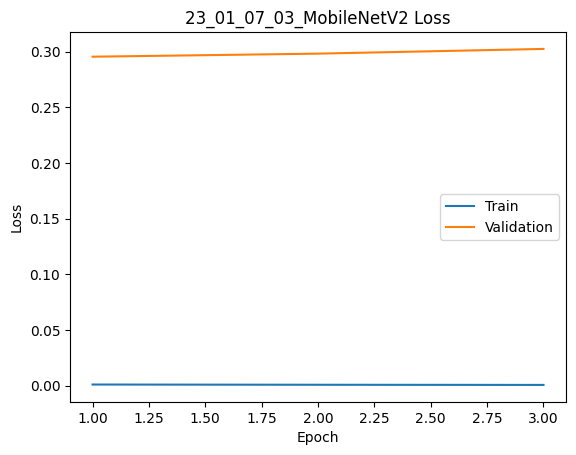

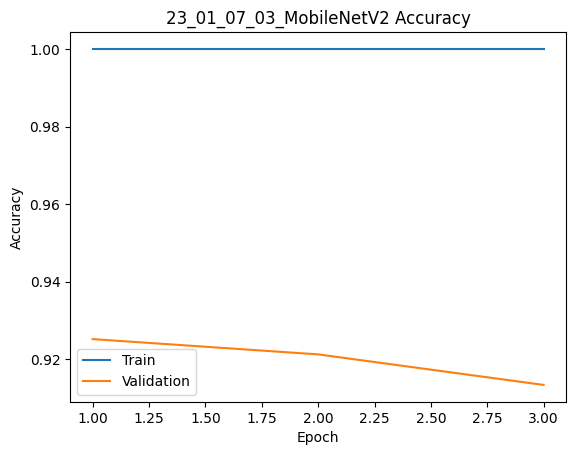

4/4 [==============================] - 1s 317ms/step


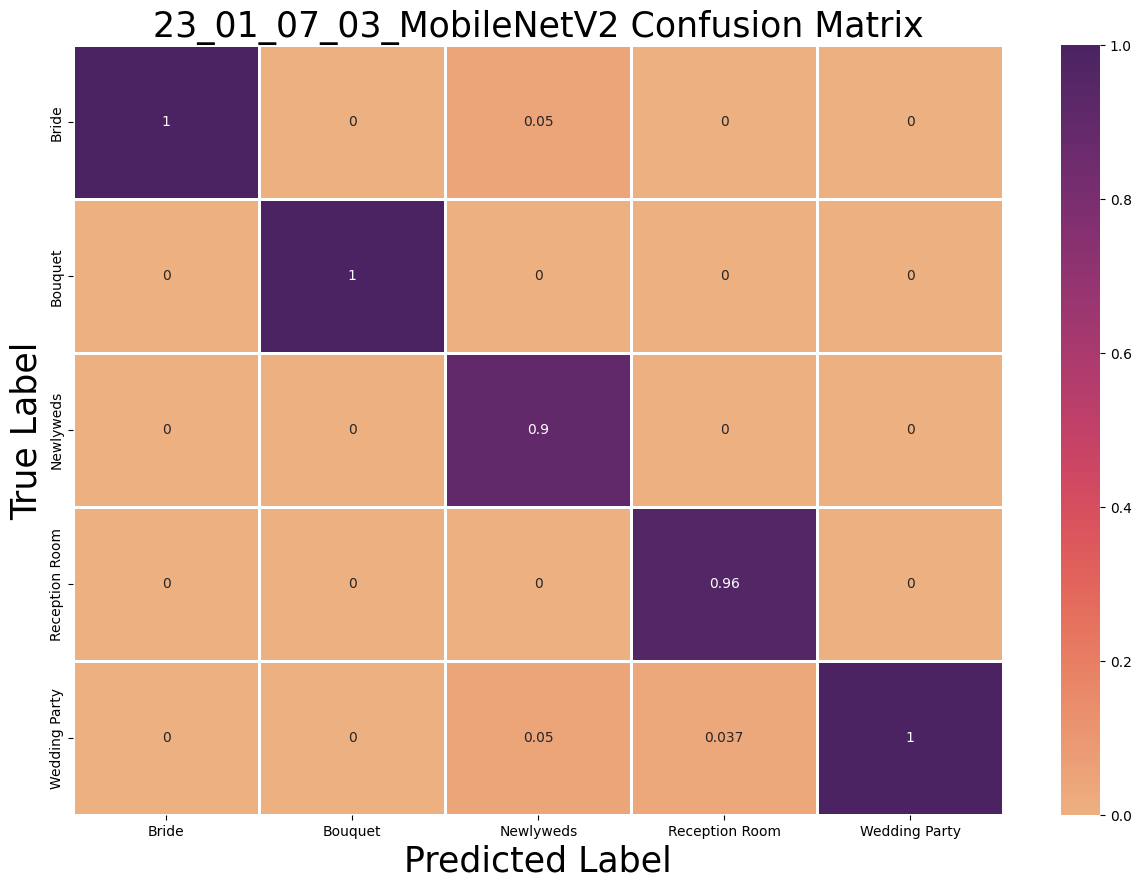

f1 - Scores 
0    0.960000
1    1.000000
2    0.947368
3    0.981132
4    0.960000
Name: f1-score, dtype: float64
Evaluation files complete


In [25]:
# Configure early stopping
early_stop = EarlyStopping(monitor="val_loss", min_delta=.001, patience=2, mode="min", verbose=1)

# Fit model
current_model = model.fit(train_generator, epochs=30, validation_data=validation_generator ,callbacks=[early_stop])

# Save results 
save_results(model.name, current_model)

# ResNet50V2

In [10]:
# ResNet50V2 - Model 01

# Base model with classification layer added

# Import Model
from tensorflow.keras.applications import ResNet50V2

model = ResNet50V2(weights="imagenet", include_top=False, input_shape=(height, width, channel))

model.trainable=False

inputs=model.input
x = model(inputs)

x =GlobalAveragePooling2D()(x)

outputs = Dense(5, activation="softmax")(x)

model = keras.Model(inputs,outputs, name='23_01_07_02_ResNet50V2')


In [5]:
# ResNet50V2 - Model 02

# Image augmentation layers added to model

# Import Model
from tensorflow.keras.applications import ResNet50V2

model = ResNet50V2(weights="imagenet", include_top=False, input_shape=(height, width, channel))

model.trainable=False

inputs=model.input
x = model(inputs)
x = RandomRotation(.2, seed=6489)(x)
x = RandomFlip(seed=6489)(x)

x = GlobalMaxPooling2D()(x)

outputs = Dense(5, activation="softmax")(x)

model = keras.Model(inputs,outputs, name='02_ResNet50V2')

In [6]:
# ResNet50V2 - Model 03

# Image augmentation layers added and learning rate reduced
# This becomes the final model

# Import Model
from tensorflow.keras.applications import ResNet50V2

model = ResNet50V2(weights="imagenet", include_top=False, input_shape=(height, width, channel))

model.trainable=False

inputs=model.input
x = model(inputs)
x = RandomRotation(.2, seed=6489)(x)
x = RandomFlip(seed=6489)(x)
x = GlobalMaxPooling2D()(x)
x = Flatten()(x)

outputs = Dense(5, activation="softmax")(x)

model = keras.Model(inputs,outputs, name='03_ResNet50V2')
tf.keras.optimizers.Adam(learning_rate=0.0001)

In [7]:
# ResNet50V2 - Model 04

# Base model with a lower learning rate

# Import Model
from tensorflow.keras.applications import ResNet50V2
model = ResNet50V2(weights="imagenet", include_top=False, input_shape=(height, width, channel))

inputs=model.input
model.trainable=False

x = model(inputs)

x =GlobalAveragePooling2D()(x)

outputs = Dense(5, activation="softmax")(x)

model = keras.Model(inputs,outputs, name='04_ResNet50V2')
tf.keras.optimizers.Adam(learning_rate=0.0001)

In [14]:
# ResNet50V2 - Model 05

# Convolution  and dropout layers added and optimizer paramters adjusted

# Import Model
from tensorflow.keras.applications import ResNet50V2
model = ResNet50V2(weights="imagenet", include_top=False, input_shape=(height, width, channel))


model.trainable=False
inputs=model.input
x = model(inputs)

x = Conv2D(1024,3, activation='relu')(x)
x = Dropout(.2)(x)

x = GlobalMaxPooling2D()(x)
Dense(5, activation="softmax")(x)

outputs = Dense(5, activation="softmax")(x)

model = keras.Model(inputs,outputs, name='23_01_07_04_ResNet50V2')

tf.keras.optimizers.Adam(learning_rate=0.0001)

In [13]:
# ResNet50V2 - Model 06

# Convolution, dropout, and dense layers added and optimizer parameters adjusted

# Import Model
from tensorflow.keras.applications import ResNet50V2
model = ResNet50V2(weights="imagenet", include_top=False, input_shape=(height, width, channel))


model.trainable=False
inputs=model.input
x = model(inputs)

x = Conv2D(1024,3, activation='relu')(x)
x = Dropout(.2)(x)


x = GlobalMaxPooling2D()(x)
x = Flatten()(x)

x = Dense(256, activation="relu")(x)

outputs = Dense(5, activation="softmax")(x)

model = keras.Model(inputs,outputs, name='06_ResNet50V2')

tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=10)

In [10]:
# ResNet50V2 - Model 07

# Convolution, dropout, and dense layers added 
# L2 regularization added
# optimizer parameters adjusted

# Import Model
from tensorflow.keras.applications import ResNet50V2
model = ResNet50V2(weights="imagenet", include_top=False, input_shape=(height, width, channel))


model.trainable=False


inputs=model.input
x = model(inputs)

x = Conv2D(1024,3, activation='relu')(x)
x = Dropout(.2)(x)
x = Conv2D(1024,3, activation='relu', kernel_regularizer=regularizers.l2(.001))(x)

x = GlobalMaxPooling2D()(x)
x = Flatten()(x)

x = Dense(256, activation="relu")(x)

outputs = Dense(5, activation="softmax")(x)

model = keras.Model(inputs,outputs, name='07_ResNet50V2')

tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=10)

# MobileNetV2

In [19]:
# MobileNetV2 - Model 20

# base model with classification layer added

# Import Model
from tensorflow.keras.applications import MobileNetV2
model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(height, width, channel))

inputs=model.input
model.trainable=False

x = model(inputs)

x =GlobalAveragePooling2D()(x)

outputs = Dense(5, activation="softmax")(x)

model = keras.Model(inputs,outputs, name='23_01_07_01_MobileNetV2')

In [21]:
# MobileNetV2 - Model 21

# image augmentation layers added

# Import Model
from tensorflow.keras.applications import MobileNetV2
model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(height, width, channel))


model.trainable=False
inputs=model.input
x = model(inputs)

x = RandomRotation(.2, seed=6489)(x)
x = RandomFlip(seed=6489)(x)
x =GlobalAveragePooling2D()(x)

outputs = Dense(5, activation="softmax")(x)

model = keras.Model(inputs,outputs, name='21c_MobileNetV2')

In [13]:
# MobileNetV2 - Model 22

# optimizer parameters adjusted

# Import Model
from tensorflow.keras.applications import MobileNetV2
model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(height, width, channel))

inputs=model.input
model.trainable=False

x = model(inputs)

x =GlobalAveragePooling2D()(x)

outputs = Dense(5, activation="softmax")(x)

model = keras.Model(inputs,outputs, name='22_MobileNetV2')
tf.keras.optimizers.Adam(learning_rate=0.0001)

In [14]:
# MobileNetV2 - Model 23

# optimizer parameters adjusted

# Import Model
from tensorflow.keras.applications import MobileNetV2
model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(height, width, channel))


model.trainable=False
inputs=model.input
x = model(inputs)

x =GlobalMaxPooling2D()(x)

outputs = Dense(5, activation="softmax")(x)

model = keras.Model(inputs,outputs, name='23_MobileNetV2')

tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=1)

In [15]:
# MobileNetV2 - Model 24

# optimizer parameters adjusted

# Import Model
from tensorflow.keras.applications import MobileNetV2
model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(height, width, channel))


model.trainable=False
inputs=model.input
x = model(inputs)

x =GlobalMaxPooling2D()(x)

outputs = Dense(5, activation="softmax")(x)

model = keras.Model(inputs,outputs, name='24_MobileNetV2')

tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=0.1)

In [16]:
# MobileNetV2 - Model 25

# optimizer parameters adjusted

# Import Model
from tensorflow.keras.applications import MobileNetV2
model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(height, width, channel))


model.trainable=False
inputs=model.input
x = model(inputs)

x =GlobalMaxPooling2D()(x)

outputs = Dense(5, activation="softmax")(x)

model = keras.Model(inputs,outputs, name='25_MobileNetV2')

tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=10)

In [22]:
# MobileNetV2 - Model 26

# Convolution, dropout, and dense layers added 
# optimizer parameters adjusted

# Import Model
from tensorflow.keras.applications import MobileNetV2
model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(height, width, channel))


model.trainable=False
inputs=model.input
x = model(inputs)

x = Conv2D(1024,3, activation='relu')(x)
x = Dropout(.2)(x)

x = GlobalMaxPooling2D()(x)
Dense(5, activation="softmax")(x)

outputs = Dense(5, activation="softmax")(x)

model = keras.Model(inputs,outputs, name='23_01_07_03_MobileNetV2')

tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=10)

In [18]:
# MobileNetV2 - Model 27

# Convolution, dropout, and flatten layers added 
# L2 regularization added
# optimizer parameters adjusted

# Import Model
from tensorflow.keras.applications import MobileNetV2
model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(height, width, channel))


model.trainable=False
inputs=model.input
x = model(inputs)

x = Conv2D(1024,3, activation='relu')(x)
x = Dropout(.2)(x)
x = Conv2D(1024,3, activation='relu')(x)
x = Dropout(.2)(x)


x = GlobalMaxPooling2D()(x)
x = Flatten()(x)

x = Dense(256, activation="relu")(x)

outputs = Dense(5, activation="softmax")(x)

model = keras.Model(inputs,outputs, name='27_MobileNetV2')

tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=10)

In [19]:
# MobileNetV2 - Model 28

# Convolution, dropout, and flatten layers added 

# optimizer parameters adjusted

# Import Model
from tensorflow.keras.applications import MobileNetV2
model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(height, width, channel))


model.trainable=False


inputs=model.input
x = model(inputs)

x = Conv2D(1024,3, activation='relu')(x)
x = Dropout(.2)(x)
x = Conv2D(1024,3, activation='relu', kernel_regularizer=regularizers.l1(.001))(x)



x = GlobalMaxPooling2D()(x)
x = Flatten()(x)

x = Dense(256, activation="relu")(x)

outputs = Dense(5, activation="softmax")(x)

model = keras.Model(inputs,outputs, name='28_MobileNetV2')

tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=10)

In [20]:
# MobileNetV2 - Model 29

# Convolution, dropout, and flatten layers added 
# L2 regularization added
# optimizer parameters adjusted

# Import Model
from tensorflow.keras.applications import MobileNetV2
model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(height, width, channel))


model.trainable=False


inputs=model.input
x = model(inputs)

x = Conv2D(1024,3, activation='relu')(x)
x = Dropout(.2)(x)
x = Conv2D(1024,3, activation='relu', kernel_regularizer=regularizers.l2(.001))(x)



x = GlobalMaxPooling2D()(x)
x = Flatten()(x)

x = Dense(256, activation="relu")(x)

outputs = Dense(5, activation="softmax")(x)

model = keras.Model(inputs,outputs, name='29_MobileNetV2')

tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=10)